In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

In [58]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True
)
datasets_train_original = datasets[0]
datasets_validate_original = datasets[1]
datasets_test_original = datasets[2]
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_

In [59]:
print(tf.random.uniform(shape=(), minval=1, maxval=5, dtype=tf.int32))

tf.Tensor(4, shape=(), dtype=int32)


In [60]:
for x,y in datasets_train_original.shuffle(1000).take(1):
    print(x.numpy().decode("utf-8"))
    print(y.numpy())

When i got this movie free from my job, along with three other similar movies.. I watched then with very low expectations. Now this movie isn't bad per se. You get what you pay for. It is a tale of love, betrayal, lies, sex, scandal, everything you want in a movie. Definitely not a Hollywood blockbuster, but for cheap thrills it is not that bad. I would probably never watch this movie again. In a nutshell this is the kind of movie that you would see either very late at night on a local television station that is just wanting to take up some time, or you would see it on a Sunday afternoon on a local television station that is trying to take up some time. Despite the bad acting, cliché lines, and sub par camera work. I didn't have the desire to turn off the movie and pretend like it never popped into my DVD player. The story has been done many times in many movies. This one is no different, no better, no worse. <br /><br />Just your average movie.
0


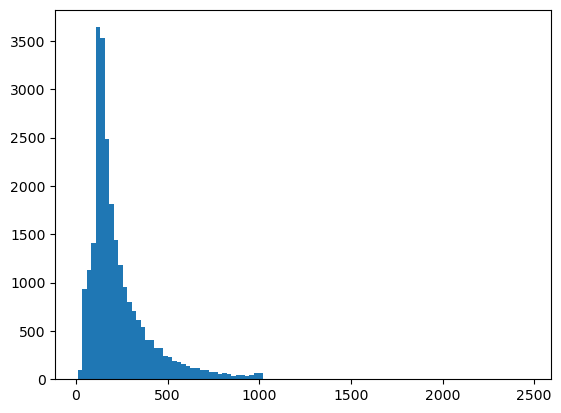

In [61]:
#distribution of number of words
#outliers IQR
lenghts = []
for x, _ in datasets_train_original:
    x = x.numpy().decode("utf-8").split()
    lenghts += [len(x)]
plt.hist(lenghts, bins=100)
plt.show()
plt.close()

In [62]:
#hyperparameter
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot"
)

encoder.adapt(datasets_train_original.map(lambda text, label: text).batch(2048))

In [63]:
encoder.get_vocabulary()[:20]

['[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film']

In [64]:
text = "Hello my dear friends! It is so great to be here today!"

def multi_hot_to_string(multi_hot):
    return " ".join([str(int(x)) for x in multi_hot])

text_encoded = encoder(text).numpy()
print(multi_hot_to_string(text_encoded))

# plt.imshow(text_encoded.numpy().reshape(1,10000))

0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [65]:
#TODO get tokens
count=0
for num in text_encoded:
  if num == 1:
    print(encoder.get_vocabulary()[count])
  count = count + 1



to
is
it
be
so
my
great
here
friends
today
dear
hello


In [66]:
dataset_train = datasets_train_original.cache()
dataset_train = dataset_train.shuffle(25_000)
dataset_train = dataset_train.batch(128)

dataset_validate = datasets_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

dataset_test = datasets_test_original.batch(128)

In [69]:
from pickletools import optimize


model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 10000)            0         
 ectorization)                                                   
                                                                 
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 10s 46ms/step - loss: 0.3360 - accuracy: 0.8639 - val_loss: 0.3227 - val_accuracy: 0.8690
Epoch 2/10
196/196 [==============================] - 9s 46ms/step - loss: 0.1874 - accuracy: 0.9316 -

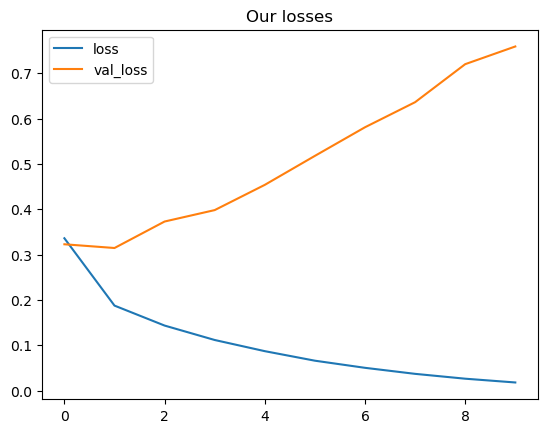

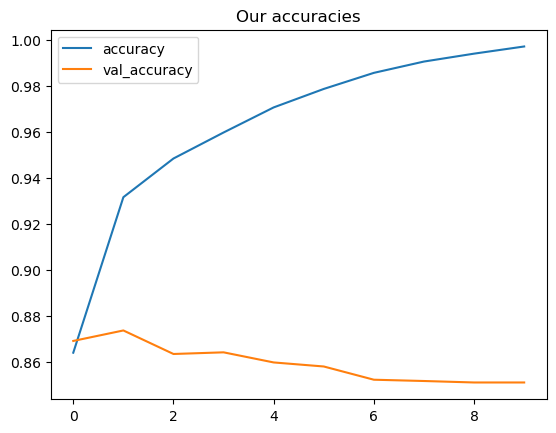

In [72]:
def render_history(history):
    plt.title("Our losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Our accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

render_history(history)

In [96]:
tf.compat.v1.Session()

In [98]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [93]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [79]:
for text, label in dataset_train.take(1):
    print(text.shape, label.shape)

(128,) (128,)


In [82]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 10000)            0         
 ectorization)                                                   
                                                                 
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 11s 52ms/step - loss: 0.3243 - accuracy: 0.8646 - val_loss: 

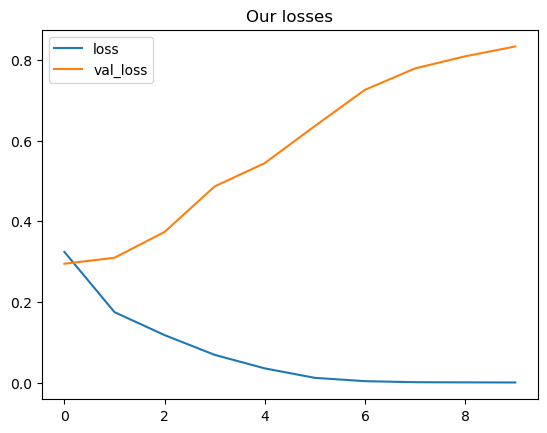

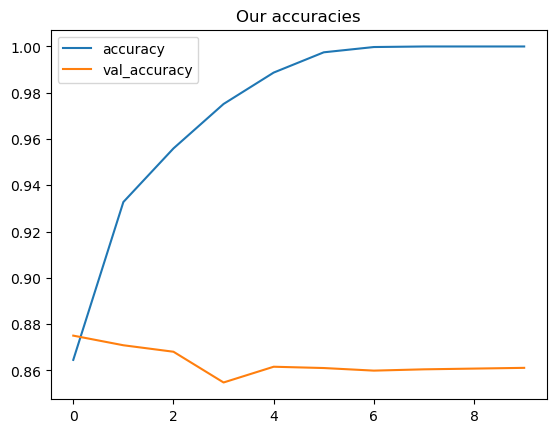

In [83]:
render_history(history)

In [91]:
model = models.Sequential()
model.add(encoder)
# model.add(layers.Dense(32, activation="relu"))
# model.add(layers.Dense(32, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    # optimizer="adam",
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_validate
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 10000)            0         
 ectorization)                                                   
                                                                 
 dense_18 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 9s 45ms/step - loss: 0.5258 - accuracy: 0.8086 - val_loss: 0.4414 - val_accuracy: 0.8518
Epoch 2/50
196/196 [==============================] - 8s 40ms/step - loss: 0.3731 - accuracy: 0.8824 - val_loss: 0.3696 - val_accuracy: 0.8750
Epoch 3/50
196/196 [==============================] - 8s 40ms/step - loss: 0.3141 - accuracy: 

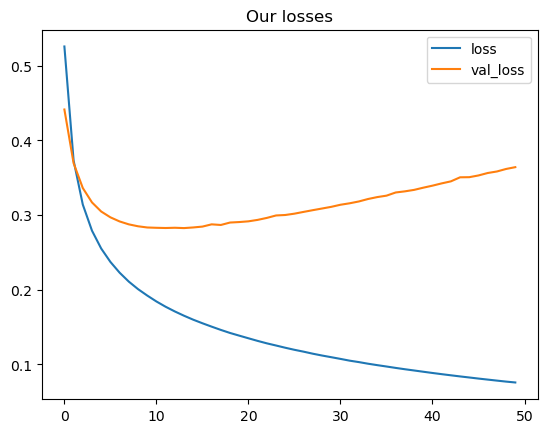

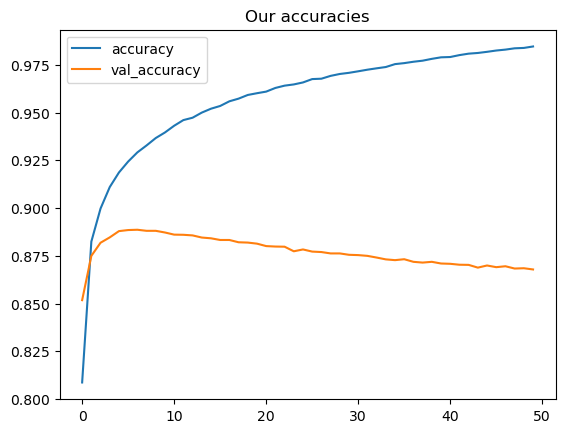

In [104]:
render_history(history)

In [102]:
collection = []
for index, word in enumerate(encoder.get_vocabulary()):
    print(type(word), word)
    prediction = model.predict([str(word)], verbose=0)[0][0]
    print(prediction)
    collection += [[word, prediction]]
    if index == 5:
        break

collection = sorted(collection, key = lambda x: x[1], reverse=True)
print(collection)

for word, prediction in collection:
    print(word, "\t", prediction)

<class 'str'> [UNK]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.5343886
<class 'numpy.str_'> the
0.5505563
<class 'numpy.str_'> and
0.53984016
<class 'numpy.str_'> a
0.50285625
<class 'numpy.str_'> of
0.4986271
<class 'numpy.str_'> to
0.507258
[['the', 0.5505563], ['and', 0.53984016], ['[UNK]', 0.5343886], ['to', 0.507258], ['a', 0.50285625], ['of', 0.4986271]]
the 	 0.5505563
and 	 0.53984016
[UNK] 	 0.5343886
to 	 0.507258
a 	 0.50285625
of 	 0.4986271


In [ ]:
model.predict(["this is a good movie i love it a lot great acting brilliant story fantastic music"])

IndexError: tuple index out of range

In [108]:
import tqdm
collection = []
for _, word in tqdm.tqdm(enumerate(encoder.get_vocabulary())):
    # print(type(word), word)
    prediction = model.predict([str(word)], verbose=0)[0][0]
    # print(prediction)
    collection += [[word, prediction]]
    # if index == 5:
    #     break

collection = sorted(collection, key = lambda x: x[1], reverse=True)
# print(collection)

for word, prediction in collection:
    print(word, "\t", prediction)

8677it [21:56,  6.59it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    -------
  File "C:\Users\DAnand\AppData\Local\Temp\ipykernel_28608\4267013635.py", line 5, in <module>
    prediction = model.predict([str(word)], verbose=0)[0][0]
  File "c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
    try:
  File "c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2029, in predict
    outputs, self.distribute_strategy, reduction="concat"
  File "c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py", line 1199, in enumerate_epochs
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 1997, in showtraceback
    except Excep

In [109]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"
)

encoder.adapt(datasets_train_original.map(lambda text,label: text).batch(512))

In [122]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    # optimizer="adam",
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=30,
    validation_data=dataset_validate
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 128)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 128, 32)           320000    
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_23 (Dense)            (None, 64)                262208    
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 582,273
Trainable params: 582,273
Non-trainable params: 0
_______________________________________________

In [123]:
# encoder.get_vocabulary()[:40]


In [124]:
# encoder.get_vocabulary()

In [113]:
encoder("This is a aassdasd great movie!")

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([11,  7,  4,  1, 85, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)>